## Question 1 – Decision Trees

Train : 1.0, Test : 0.9020979020979021


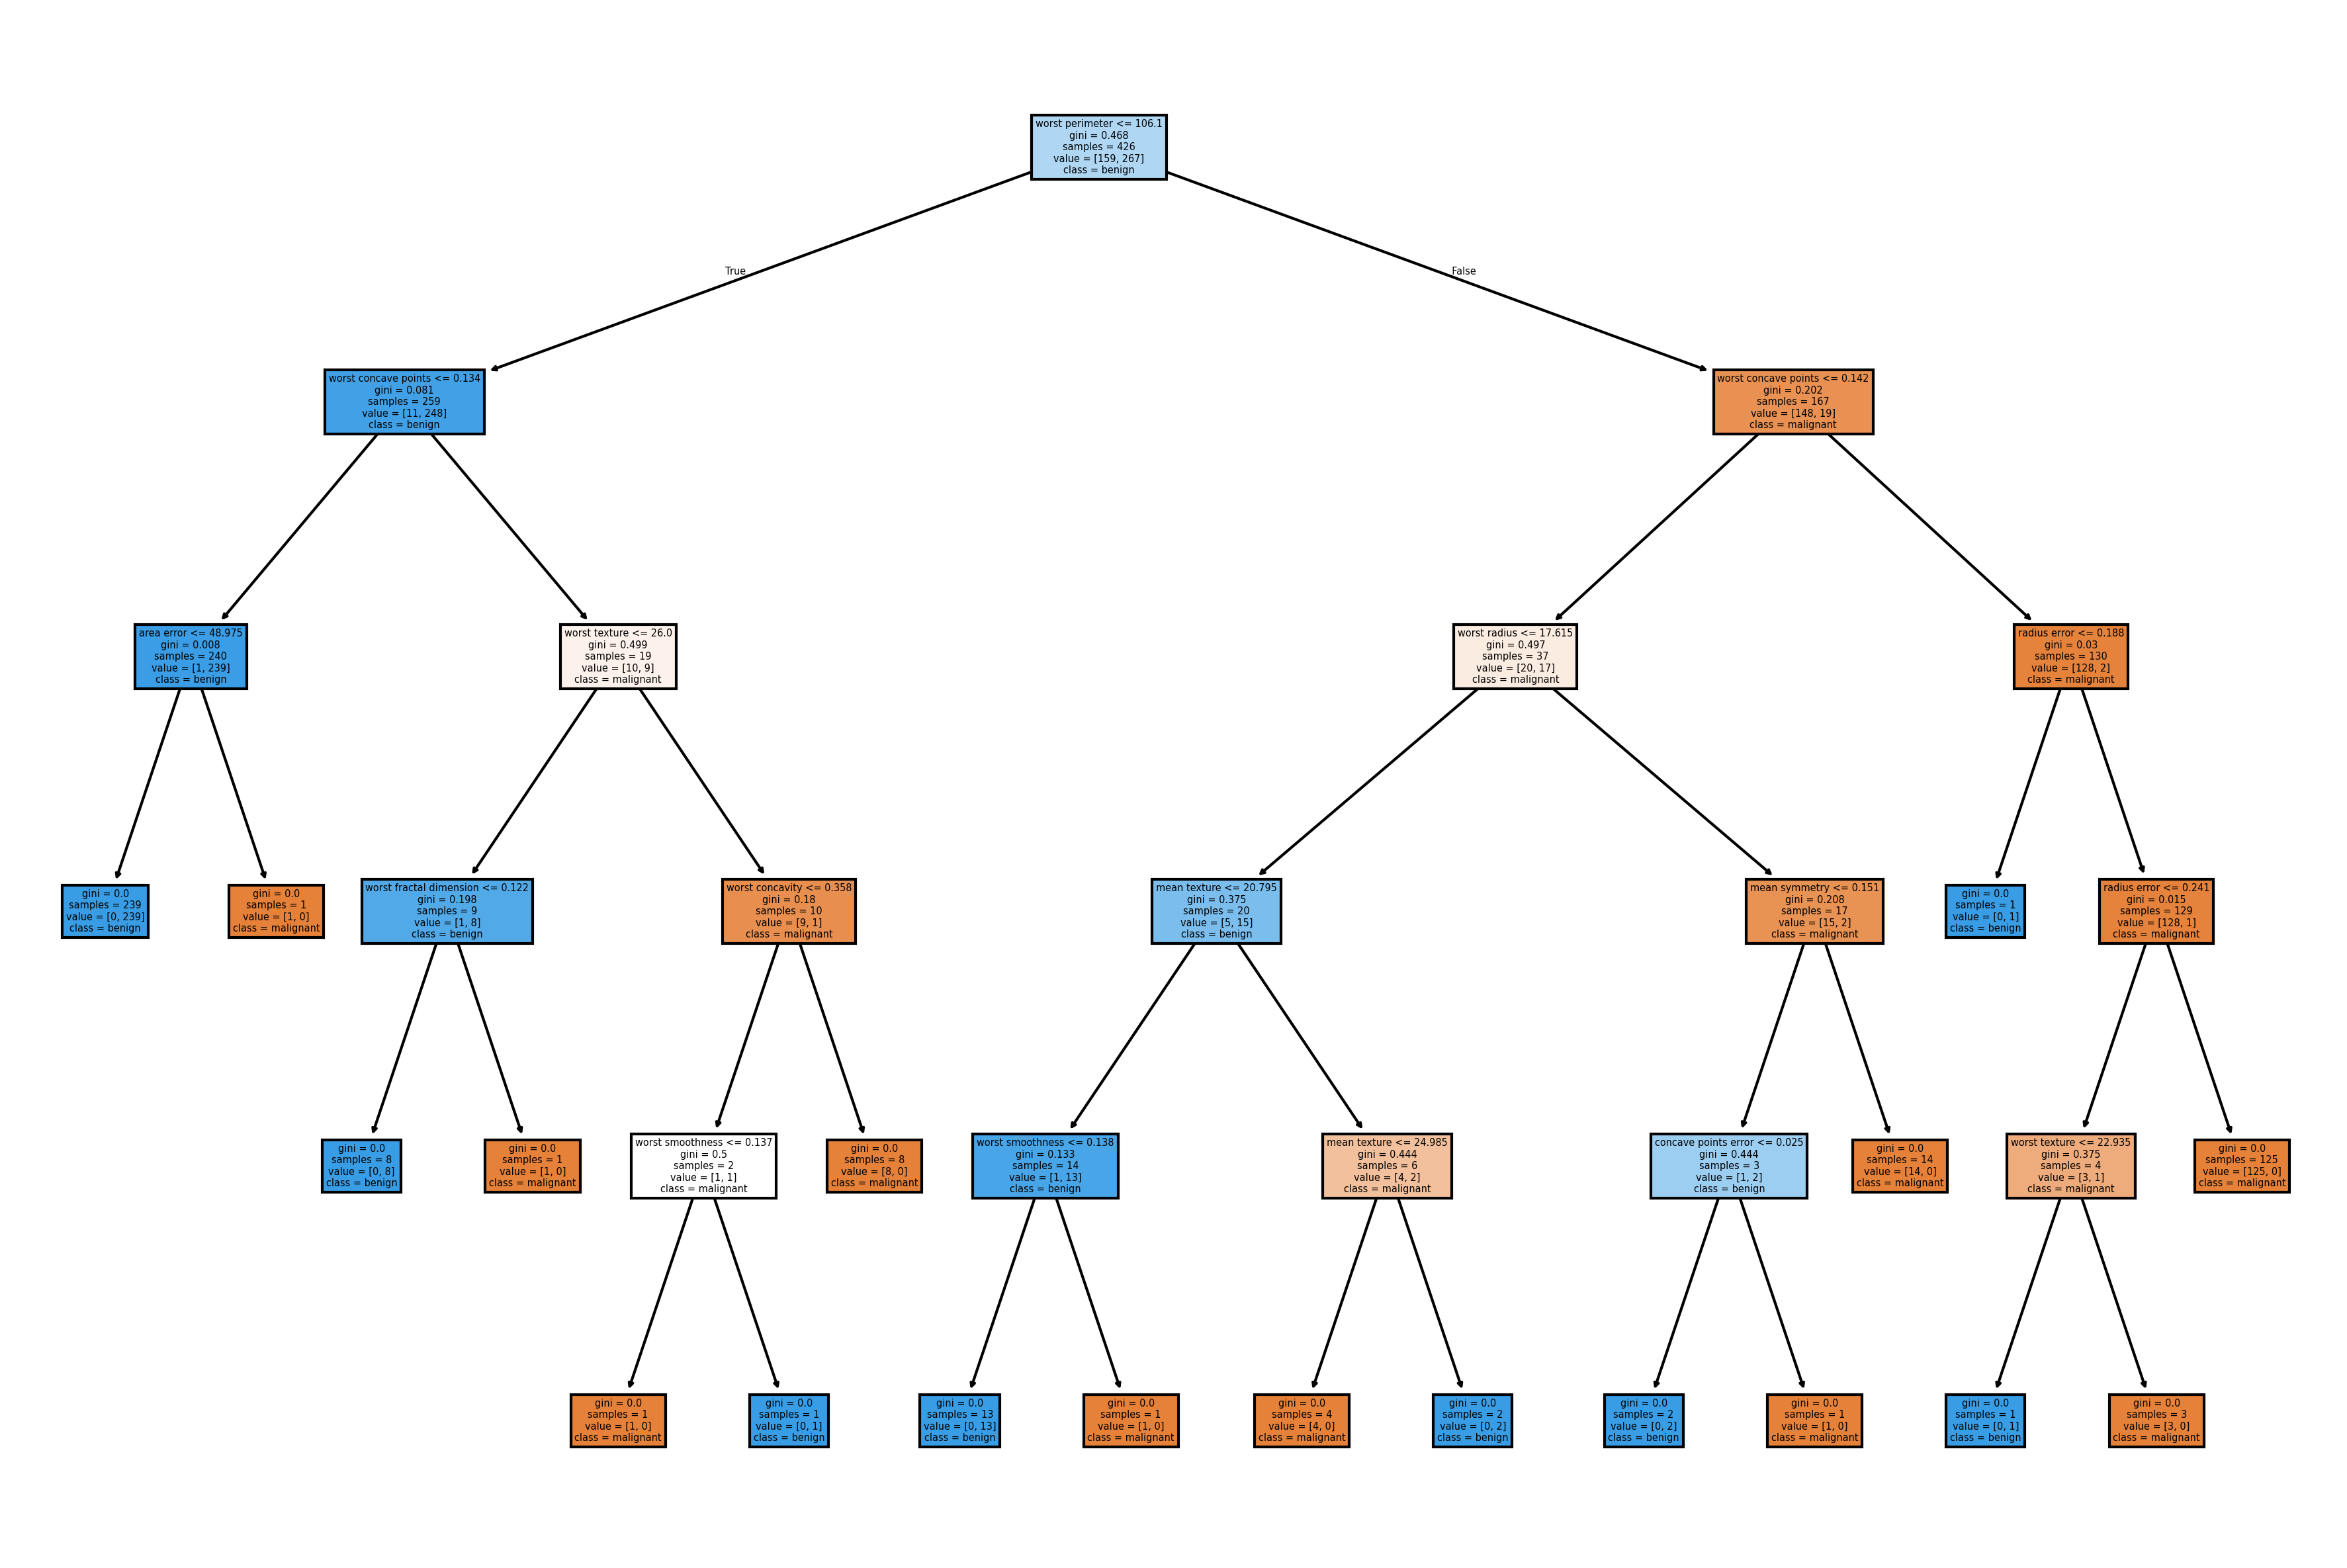

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Chargement des données
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, stratify=cancer.target)

# Entraînement de l'arbre de décision
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Calcul des scores
print("Train : {}, Test : {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

# Visualisation de l'arbre
plt.figure(figsize=(15, 10), dpi=300) # parameters : figsize, dpi
plot_tree(clf, filled=True, class_names=cancer.target_names, feature_names=cancer.feature_names)
plt.show()


Train: 0.9765258215962441; Test: 0.916083916083916


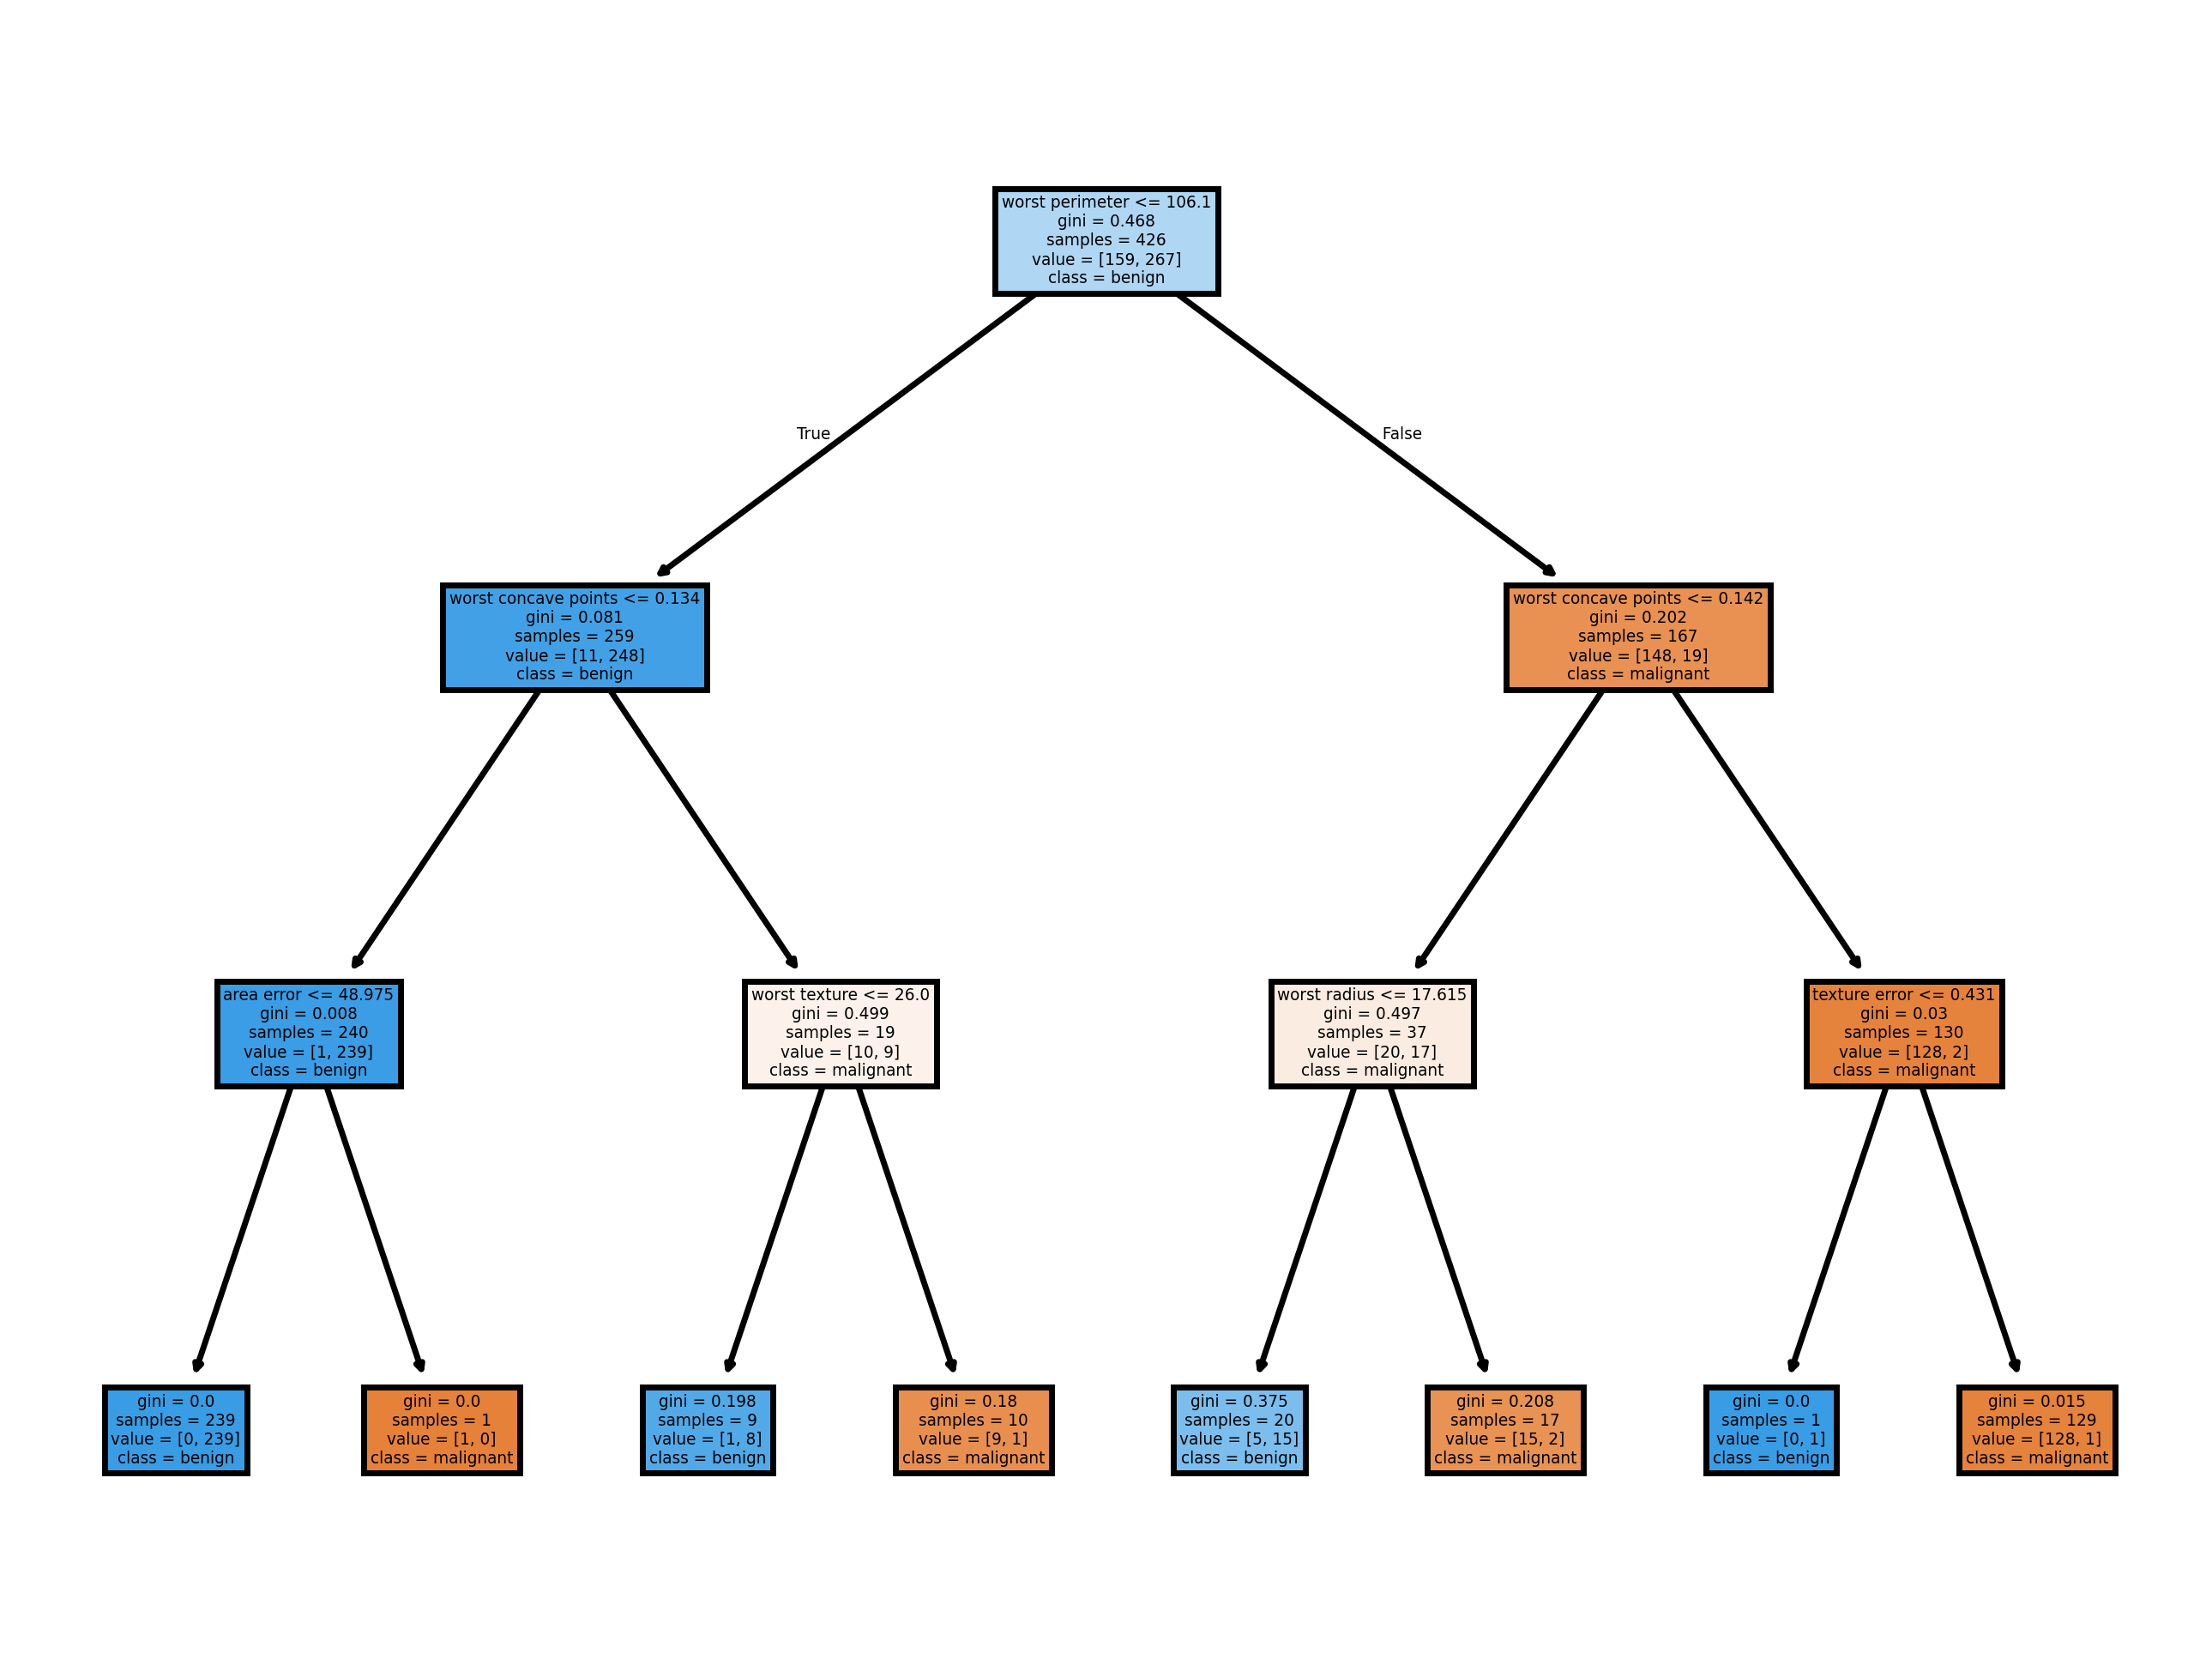

In [ ]:
# Part 2 : Repeat the previous steps (score and visualization), with a maximum depth of 3(max_depth=3). What do you observe? What happens if you change the value of the min_samples_leaf or min_samples_split?
clf = DecisionTreeClassifier(random_state = 0, max_depth=3)
clf.fit(X_train, y_train)

print("Train: {}; Test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

plt.figure(dpi=500) #parameters: figsize, dpi
plot_tree(clf, filled = True,
class_names = cancer.target_names,
feature_names = cancer.feature_names) #parameters: filled, class_names, feature_names
plt.show()

In [5]:
# part 3
# Importance des caractéristiques
import pandas as pd

feature_importances_depth_3 = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': clf_depth_3.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance des caractéristiques (max_depth=3) :")
print(feature_importances_depth_3)


Importance des caractéristiques (max_depth=3) :
                    Feature  Importance
27     worst concave points    0.786130
23               worst area    0.127674
13               area error    0.047567
21            worst texture    0.027141
1              mean texture    0.011488
0               mean radius    0.000000
16          concavity error    0.000000
28           worst symmetry    0.000000
26          worst concavity    0.000000
25        worst compactness    0.000000
24         worst smoothness    0.000000
22          worst perimeter    0.000000
20             worst radius    0.000000
19  fractal dimension error    0.000000
18           symmetry error    0.000000
17     concave points error    0.000000
15        compactness error    0.000000
14         smoothness error    0.000000
12          perimeter error    0.000000
11            texture error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000
8             mean symmetry    0

Score d'entraînement (min_samples_leaf=5) : 0.9714285714285714
Score de test (min_samples_leaf=5) : 0.9298245614035088


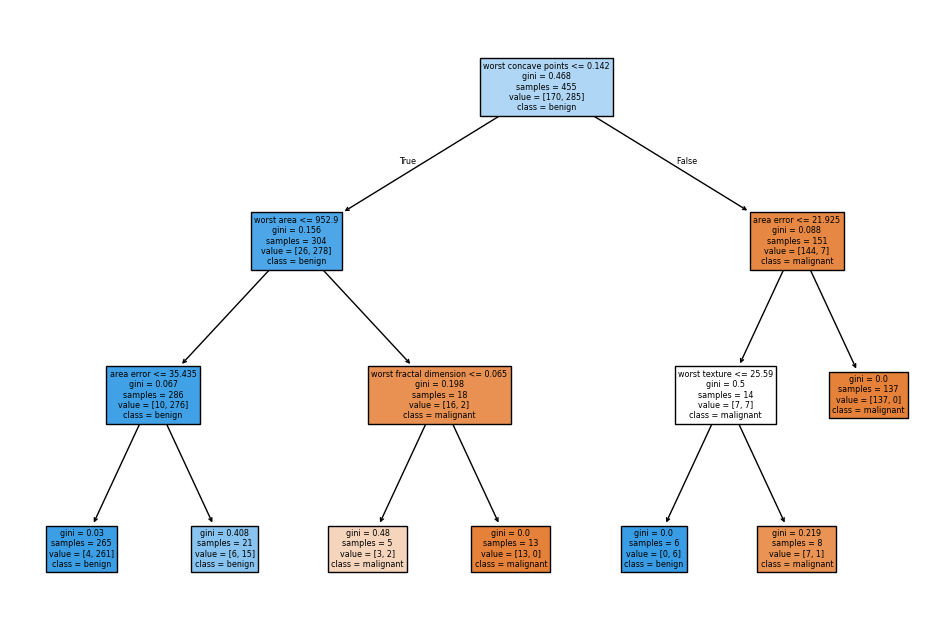

In [ ]:
# part 4 
clf_min_samples_leaf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)
clf_min_samples_leaf.fit(X_train, y_train)

print("Score d'entraînement (min_samples_leaf=5) :", clf_min_samples_leaf.score(X_train, y_train))
print("Score de test (min_samples_leaf=5) :", clf_min_samples_leaf.score(X_test, y_test))

plt.figure(figsize=(12, 8), dpi=100)
plot_tree(clf_min_samples_leaf, filled=True, class_names=cancer.target_names, feature_names=cancer.feature_names)
plt.show()


Score d'entraînement (min_samples_split=10) : 0.9736263736263736
Score de test (min_samples_split=10) : 0.9210526315789473


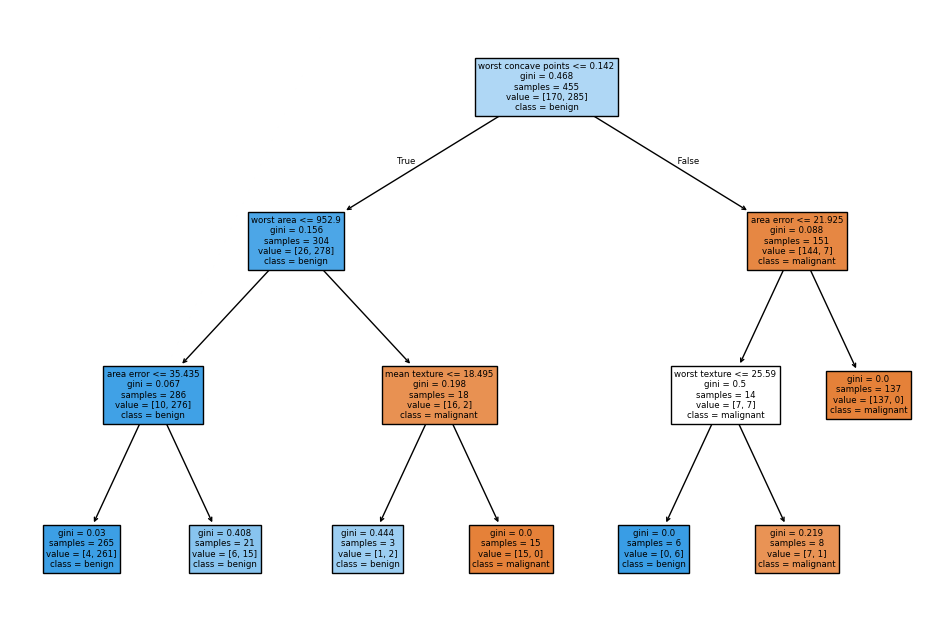

In [ ]:
clf_min_samples_split = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0)
clf_min_samples_split.fit(X_train, y_train)

print("Score d'entraînement (min_samples_split=10) :", clf_min_samples_split.score(X_train, y_train))
print("Score de test (min_samples_split=10) :", clf_min_samples_split.score(X_test, y_test))

plt.figure(figsize=(12, 8), dpi=100)
plot_tree(clf_min_samples_split, filled=True, class_names=cancer.target_names, feature_names=cancer.feature_names)
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [2, 3, 4, 5, 6],
    'min_samples_leaf' : [3, 5, 7, 9, 11],
    'min_samples_split' : [6, 7, 8, 9, 10, 11, 12]
}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=0), params)
gridsearch.fit(X_train, y_train)
print("Best parameters :", gridsearch.best_params_)
print("train: {}, test: {}".format(gridsearch.score(X_train, y_train), gridsearch.score(X_test, y_test)))

Best parameters : {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 6}
train: 0.9765258215962441, test: 0.9230769230769231


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [21]:
gridsearch.cv_results_['rank_test_score']

array([ 71,  71,  71,  71,  71,  71,  71, 142, 142, 142, 142, 142, 142,
       142, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155,
       155, 155, 155, 155, 155, 155, 155, 155, 155, 141, 149, 149, 149,
       149, 149, 149,  71,  71,  71,  71,  71,  71,  71,  60,  60,  60,
        60,  60,  60,  60,  85,  85,  85,  85,  85,  85,  85,  85,  85,
        85,  85,  85,  85,  85,  22,  22,  52,  52,  24,  24,  24,   1,
         1,   1,   1,   1,  16,  16,  31,  31,  31,  31,  31,  31,  31,
        85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,
        85,  24,  24,  67,  67,  52,  52,  52,   1,   1,   1,   1,   1,
        16,  16,  31,  31,  31,  31,  31,  31,  31,  85,  85,  85,  85,
        85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  24,  24,  67,
        67,  52,  52,  52,   1,   1,   1,   1,   1,  16,  16,  31,  31,
        31,  31,  31,  31,  31,  85,  85,  85,  85,  85,  85,  85,  85,
        85,  85,  85,  85,  85,  85], dtype=int32)

In [22]:
# part 4 
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01069388, 0.        , 0.01090021, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04022023, 0.03226776, 0.79120523, 0.        , 0.        ,
       0.        , 0.        , 0.11471269, 0.        , 0.        ])